In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
img=cv2.imread('DATA/train/angry/Training_10118481.jpg')

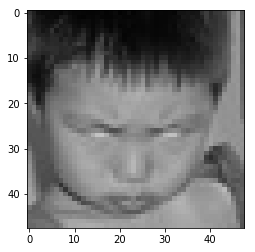

In [29]:
plt.imshow(img)

In [30]:
img.shape

(48, 48, 3)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_path='DATA/train'
test_path='DATA/test'

In [33]:
image_gen=ImageDataGenerator(rescale=1.0/255)

In [34]:
train_data = image_gen.flow_from_directory(train_path,target_size=(48,48),batch_size=64,color_mode="grayscale",class_mode='categorical') 

Found 28710 images belonging to 7 classes.


In [35]:
test_data = image_gen.flow_from_directory(test_path,target_size=(48,48),batch_size=64,color_mode="grayscale",class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [36]:
train_data[0][0].shape

(64, 48, 48, 1)

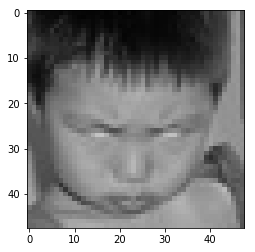

In [37]:
plt.imshow(img)

In [38]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [39]:
# building model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Dropout

In [40]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [ ]:
emotion_model = model.fit_generator(train_data,epochs=50,steps_per_epoch=28709//64,validation_data=test_data,validation_steps=7178//64)

Epoch 1/50
448/448 [==============================] - 966s 2s/step - loss: 1.7233 - acc: 0.3011 - val_loss: 1.5152 - val_acc: 0.4132
Epoch 2/50
448/448 [==============================] - 978s 2s/step - loss: 1.4534 - acc: 0.4355 - val_loss: 1.3299 - val_acc: 0.4912
Epoch 3/50
448/448 [==============================] - 531s 1s/step - loss: 1.3064 - acc: 0.4997 - val_loss: 1.2148 - val_acc: 0.5355
Epoch 4/50
448/448 [==============================] - 547s 1s/step - loss: 1.2276 - acc: 0.5290 - val_loss: 1.2052 - val_acc: 0.5403
Epoch 5/50
448/448 [==============================] - 558s 1s/step - loss: 1.1725 - acc: 0.5526 - val_loss: 1.1341 - val_acc: 0.5691
Epoch 6/50
448/448 [==============================] - 3271s 7s/step - loss: 1.1184 - acc: 0.5725 - val_loss: 1.1191 - val_acc: 0.5768
Epoch 7/50
448/448 [==============================] - 505s 1s/step - loss: 1.0797 - acc: 0.5933 - val_loss: 1.0884 - val_acc: 0.5913
Epoch 8/50
448/448 [==============================] - 501s 1s/step -

In [66]:
model.save('main_model.h5')

In [1]:
from keras.models import load_model
model1 = load_model('main_model.h5')

Using TensorFlow backend.


In [132]:
import numpy as np
from keras.preprocessing import image
file_path='n.jpg'

img = image.load_img(file_path,target_size=(48,48))
arr_img = image.img_to_array(img)
arr_gray = cv2.cvtColor(arr_img,cv2.COLOR_BGR2GRAY)
arr_img1 = arr_gray.reshape(48,48,1)
object_img = np.expand_dims(arr_img1,axis=0)

In [133]:
predict = model1.predict_classes(object_img)

In [134]:
predict

array([4], dtype=int64)

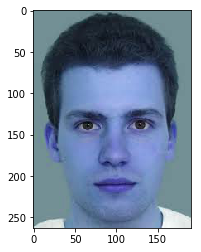

In [135]:
plt.imshow(cv2.imread('n.jpg'))

In [116]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}